텐서 생성

In [ ]:
import torch

#python numpy가 배열을 생성하는 방식과 동일
print(torch.tensor([1, 2, 3])) # 입력된 데이터를 복사해 텐서로 변환, 자동으로 자료형 할당
print(torch.Tensor([[1, 2, 3], [4, 5, 6]])) # 텐서의 기본형(float)으로 텐서 인스턴스 생성
print(torch.LongTensor([[1, 2, 3], [4, 5, 6]])) # 자료형을 명확하게 표현
print(torch.FloatTensor([1, 2, 3])) # 이외에도 int, double, boolean 형식이 있음

tensor([1, 2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([1., 2., 3.])


텐서 속성

- 형태
- 자료형
- 장치: 텐더의 GPU 가속 여부

In [ ]:
import torch

tensor = torch.rand(1, 2) #0과 1 사이의 무작위 숫자를 균등 분포로 생성하는 함수
print(tensor)
print(tensor.shape)
print(tensor.dtype)
print(tensor.device) #GPU 가속 여부를 설정하지 않았기에 CPU 장치 사용해서 연산함

tensor([[0.2201, 0.9961]])
torch.Size([1, 2])
torch.float32
cpu


차원 변환

In [ ]:
import torch

tensor = torch.rand(1, 2)
print(tensor)
print(tensor.shape)

tensor = tensor.reshape(2, 1) #차원 변환
print(tensor)
print(tensor.shape)

tensor([[0.1958, 0.6791]])
torch.Size([1, 2])
tensor([[0.1958],
        [0.6791]])
torch.Size([2, 1])


자료형 설정

In [ ]:
import torch

tensor = torch.rand((3, 3), dtype=torch.float) #float과 torch.float은 다름!
print(tensor)

tensor([[0.8765, 0.8552, 0.5245],
        [0.8069, 0.5686, 0.5329],
        [0.9580, 0.6033, 0.1962]])


장치 설정

In [ ]:
# 텐서 GPU 장치 설정

import torch

device = "cuda" if torch.cuda.is_available() else "cpu" #cuda 사용 여부 확인
cpu = torch.FloatTensor([1, 2, 3])
gpu = torch.cuda.FloatTensor([1, 2, 3])
tensor = torch.rand((1, 1), device=device)
print(device)
print(cpu)
print(gpu)
print(tensor)

cuda
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([[0.5695]], device='cuda:0')


장치 변환

In [ ]:
import torch

cpu = torch.FloatTensor([1, 2, 3])
gpu = cpu.cuda()
gpu2cpu = gpu.cpu()
cpu2gpu = cpu.to("cuda")
print(cpu)
print(gpu)
print(gpu2cpu)
print(cpu2gpu)

tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')


넘파이 배열의 텐서 변환
: 텐서는 넘파이와 매우 친화적인 구조를 가지기에 별다른 변환 없이 적용 가능!

- torch.tensor에 넘파이 배열 그대로 입력
- torch.Tensor에 넘파이 배열 그대로 입력
- from_numpy 매서드를 통해 변환

In [ ]:
import torch
import numpy as np

ndarray = np.array([1, 2, 3], dtype=np.uint8)
print(torch.tensor(ndarray))
print(torch.Tensor(ndarray))
print(torch.from_numpy(ndarray))

tensor([1, 2, 3], dtype=torch.uint8)
tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.uint8)


텐서의 넘파이 배열 변환: 추론된 결과를 후처리 하거나 결과값을 활용할 때 주로 사용됨

In [ ]:
import torch

tensor = torch.cuda.FloatTensor([1, 2, 3])
ndarray = tensor.detach().cpu().numpy()
print(ndarray)
print(type(ndarray))

[1. 2. 3.]
<class 'numpy.ndarray'>


통계적 가설 검정 사례
- 쌍체 t-검정: 동일한 항목 또는 그룹을 두 번 테스트 할 때 사용
- 비쌍체 t-검정: 등분산성을 만족하는 두 개의 독립적인 그룹 간의 평균 비교

-> 머신러닝 통계적 가설을 적용한다면 비쌍체 t-검정을 사용해야함.

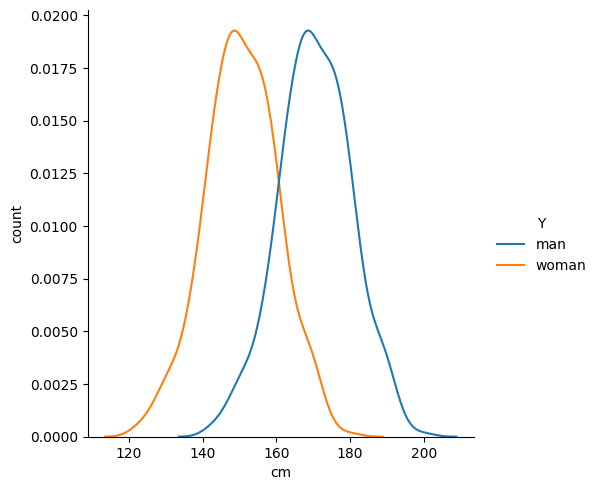

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

#특정 평균(loc)과 표준편차(scale)를 따르는 분포에서 데이터를 샘플링한 함수
#남 여 각각 총 500개의 데이터 샘플링함
man_height = stats.norm.rvs(loc=170, scale=10, size=500, random_state=1)
woman_height = stats.norm.rvs(loc=150, scale=10, size=500, random_state=1)

X = np.concatenate([man_height, woman_height])
Y = ["man"] * len(man_height) + ["woman"] * len(woman_height)

df = pd.DataFrame(list(zip(X, Y)), columns=["X", "Y"])
fig = sns.displot(data=df, x="X", hue="Y", kind="kde")
fig.set_axis_labels("cm", "count")
plt.show()

In [ ]:
#통계적으로 키(Y)가 성별 차이(X)에 유의미한 요소인지 비쌍체 t-검정으로 확인해본다

statistic, pvalue = stats.ttest_ind(man_height, woman_height, equal_var=True)

print("statistic:", statistic)
print("pvalue:", pvalue)
#통계량이 크고 유의 확률이 낮으면 귀무가설이 참일 확률이 낮다고 할 수 있음.
print("*:", pvalue < 0.05)
print("**:", pvalue < 0.001)

statistic: 31.96162891312776
pvalue: 6.2285854381989205e-155
*: True
**: True


단순 선형 회귀: 넘파이

In [ ]:
#데이터 선언(넘파이)
import numpy as np

x = np.array(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
     [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
     [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)

y = np.array(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
     [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
     [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

#하이퍼파라미터 초기화(넘파이)
weight = 0.0 #가중치
bias = 0.0 #편향
learning_rate = 0.005 #학습률

#에폭 설정: 인공 신경망에서 순전파와 역전파 과정 등의 모델 연산을 전체 데이터세트가 1회 통과하는 것을 의미
for epoch in range(10000): #10,000회의 에폭이 설정됨.
    y_hat = weight * x + bias
    cost = ((y - y_hat) ** 2).mean()

    #가중치와 편향 갱신
    weight = weight - learning_rate * ((y_hat - y) * x).mean()
    bias = bias - learning_rate * (y_hat - y).mean()

    if (epoch + 1) % 1000 == 0:
        print(f"epoch: {epoch + 1:4d}, weight: {weight:.3f}, bias: {bias:.3f}, cost: {cost:.3f}")


epoch: 1000, weight: 0.872, bias: -0.290, cost: 1.377
epoch: 2000, weight: 0.877, bias: -0.391, cost: 1.373
epoch: 3000, weight: 0.878, bias: -0.422, cost: 1.372
epoch: 4000, weight: 0.879, bias: -0.432, cost: 1.372
epoch: 5000, weight: 0.879, bias: -0.435, cost: 1.372
epoch: 6000, weight: 0.879, bias: -0.436, cost: 1.372
epoch: 7000, weight: 0.879, bias: -0.436, cost: 1.372
epoch: 8000, weight: 0.879, bias: -0.436, cost: 1.372
epoch: 9000, weight: 0.879, bias: -0.436, cost: 1.372
epoch: 10000, weight: 0.879, bias: -0.436, cost: 1.372


In [ ]:
#learning_rate = 0.001
import numpy as np

x = np.array(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
     [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
     [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)

y = np.array(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
     [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
     [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

weight = 0.0
bias = 0.0
learning_rate = 0.001

for epoch in range(10000):
    y_hat = weight * x + bias
    cost = ((y - y_hat) ** 2).mean()

    weight = weight - learning_rate * ((y_hat - y) * x).mean()
    bias = bias - learning_rate * (y_hat - y).mean()

    if (epoch + 1) % 1000 == 0:
        print(f"epoch: {epoch + 1:4d}, weight: {weight:.3f}, bias: {bias:.3f}, cost: {cost:.3f}")


epoch: 1000, weight: 0.860, bias: -0.059, cost: 1.406
epoch: 2000, weight: 0.864, bias: -0.138, cost: 1.393
epoch: 3000, weight: 0.867, bias: -0.201, cost: 1.385
epoch: 4000, weight: 0.870, bias: -0.251, cost: 1.380
epoch: 5000, weight: 0.872, bias: -0.290, cost: 1.377
epoch: 6000, weight: 0.873, bias: -0.321, cost: 1.375
epoch: 7000, weight: 0.874, bias: -0.345, cost: 1.374
epoch: 8000, weight: 0.875, bias: -0.364, cost: 1.373
epoch: 9000, weight: 0.876, bias: -0.379, cost: 1.373
epoch: 10000, weight: 0.877, bias: -0.391, cost: 1.373


In [ ]:
#learning_rate = 0.007
import numpy as np

x = np.array(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
     [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
     [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)

y = np.array(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
     [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
     [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

weight = 100000.0
bias = 100000.0
learning_rate = 0.005

for epoch in range(10000):
    y_hat = weight * x + bias
    cost = ((y - y_hat) ** 2).mean()

    weight = weight - learning_rate * ((y_hat - y) * x).mean()
    bias = bias - learning_rate * (y_hat - y).mean()

    if (epoch + 1) % 1000 == 0:
        print(f"epoch: {epoch + 1:4d}, weight: {weight:.3f}, bias: {bias:.3f}, cost: {cost:.3f}")


epoch: 1000, weight: -1424.473, bias: 28959.921, cost: 199837609.496
epoch: 2000, weight: -434.326, bias: 8842.065, cost: 18630292.726
epoch: 3000, weight: -132.003, bias: 2699.456, cost: 1736850.403
epoch: 4000, weight: -39.694, bias: 823.925, cost: 161922.863
epoch: 5000, weight: -11.509, bias: 251.267, cost: 15096.852
epoch: 6000, weight: -2.904, bias: 76.417, cost: 1408.681
epoch: 7000, weight: -0.276, bias: 23.030, cost: 132.572
epoch: 8000, weight: 0.526, bias: 6.729, cost: 13.604
epoch: 9000, weight: 0.771, bias: 1.752, cost: 2.512
epoch: 10000, weight: 0.846, bias: 0.232, cost: 1.479


단순 선형 회귀: 파이토치

In [ ]:
#framework 선언
import torch
from torch import optim #최적화 함수가 포함돼있는 모듈

x = torch.FloatTensor(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
     [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
     [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)

y = torch.FloatTensor(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
     [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
     [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

#하이퍼파라미터 초기화
weight = torch.zeros(1, requires_grad=True) #0의 값을 갖는 텐서 생성, 텐서 크기는 1
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

#최적화 선언
optimizer = optim.SGD([weight, bias], lr=learning_rate) #최적화 함수 생성

#에폭, 가설, 손실 함수 선언
for epoch in range(10000):
    hypothesis = x * weight + bias
    cost = torch.mean((hypothesis - y) ** 2)

    optimizer.zero_grad() #optimizer 변수에 포함시킨 매개변수들의 기울기 0으로 초기화
    cost.backward() #역전파를 수행
    optimizer.step() #최적화

    if (epoch + 1) % 1000 == 0:
        print(f"epoch: {epoch + 1:4d}, weight: {weight.item():.3f}, bias: {bias.item():.3f}, cost: {cost.item():.3f}")

epoch: 1000, weight: 0.864, bias: -0.138, cost: 1.393
epoch: 2000, weight: 0.870, bias: -0.251, cost: 1.380
epoch: 3000, weight: 0.873, bias: -0.321, cost: 1.375
epoch: 4000, weight: 0.875, bias: -0.364, cost: 1.373
epoch: 5000, weight: 0.877, bias: -0.391, cost: 1.373
epoch: 6000, weight: 0.878, bias: -0.408, cost: 1.372
epoch: 7000, weight: 0.878, bias: -0.419, cost: 1.372
epoch: 8000, weight: 0.878, bias: -0.425, cost: 1.372
epoch: 9000, weight: 0.879, bias: -0.429, cost: 1.372
epoch: 10000, weight: 0.879, bias: -0.432, cost: 1.372


In [ ]:
#신경망 패키지 적용
import torch
from torch import optim, nn

x = torch.FloatTensor(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
     [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
     [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)

y = torch.FloatTensor(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
     [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
     [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)
#모델 선언
#weight = torch.zeros(1, requires_grad=True)
#bias = torch.zeros(1, requires_grad=True)
model = nn.Linear(1, 1)
#평균 제곱 오차 클래스
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

#순방향 연산
for epoch in range(10000):
    hypothesis = model(x)
    cost = criterion(hypothesis, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch+1:4d}, Model: {list(model.parameters())}, Cost: {cost:.3f}")

Epoch: 1000, Model: [Parameter containing:
tensor([[0.8697]], requires_grad=True), Parameter containing:
tensor([-0.2494], requires_grad=True)], Cost: 1.380
Epoch: 2000, Model: [Parameter containing:
tensor([[0.8732]], requires_grad=True), Parameter containing:
tensor([-0.3198], requires_grad=True)], Cost: 1.375
Epoch: 3000, Model: [Parameter containing:
tensor([[0.8753]], requires_grad=True), Parameter containing:
tensor([-0.3637], requires_grad=True)], Cost: 1.373
Epoch: 4000, Model: [Parameter containing:
tensor([[0.8767]], requires_grad=True), Parameter containing:
tensor([-0.3910], requires_grad=True)], Cost: 1.373
Epoch: 5000, Model: [Parameter containing:
tensor([[0.8775]], requires_grad=True), Parameter containing:
tensor([-0.4080], requires_grad=True)], Cost: 1.372
Epoch: 6000, Model: [Parameter containing:
tensor([[0.8780]], requires_grad=True), Parameter containing:
tensor([-0.4185], requires_grad=True)], Cost: 1.372
Epoch: 7000, Model: [Parameter containing:
tensor([[0.8784

데이터세트: 학습에 필요한 데이터 샘플을 정제하고 정답을 저장하는 기능 제공

In [ ]:
# 기본형
class Dataset:
    #입력된 데이터의 전처리 과정을 수행
    def __init__(self, data, *arg, **kwangs):
        self.data = data # 새로운 인스턴스가 생성될 때 학습에 사용될 데이터 선언 및 형태 변형
    #학습을 진행할 때 사용되는 하나의 행을 불러오는 과정
    def __getitem__(self, index):
        return tuple(data[index] for data in data.tensors)
    #학습에 사용된 전체 데이터세트의 개수를 반환
    def __len__(self):
        return self.data[0].size(0)


다중 선형 회귀

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

train_x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])

train_y = torch.FloatTensor([
    [0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]
])

#데이터세트와 데이터로더
train_dataset = TensorDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)

#편향 제거
model = nn.Linear(2, 2, bias=True)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(20000):
    cost = 0.0 #에폭마다 오차를 다시 계산하기 위해 cost를 0으로 초기화

    for batch in train_dataloader:
        x, y = batch
        output = model(x)

        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch+1:4d}, Model: {list(model.parameters())}, Cost: {cost:.3f}")

Epoch: 1000, Model: [Parameter containing:
tensor([[0.5868, 0.2078],
        [0.2622, 0.9887]], requires_grad=True), Parameter containing:
tensor([-0.5640, -0.5820], requires_grad=True)], Cost: 0.023
Epoch: 2000, Model: [Parameter containing:
tensor([[0.6938, 0.1524],
        [0.3121, 0.9629]], requires_grad=True), Parameter containing:
tensor([-0.7264, -0.6576], requires_grad=True)], Cost: 0.006
Epoch: 3000, Model: [Parameter containing:
tensor([[0.7483, 0.1243],
        [0.3375, 0.9498]], requires_grad=True), Parameter containing:
tensor([-0.8091, -0.6961], requires_grad=True)], Cost: 0.002
Epoch: 4000, Model: [Parameter containing:
tensor([[0.7762, 0.1099],
        [0.3504, 0.9431]], requires_grad=True), Parameter containing:
tensor([-0.8512, -0.7157], requires_grad=True)], Cost: 0.000
Epoch: 5000, Model: [Parameter containing:
tensor([[0.7903, 0.1026],
        [0.3570, 0.9397]], requires_grad=True), Parameter containing:
tensor([-0.8727, -0.7257], requires_grad=True)], Cost: 0.000


모듈 클래스

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__() #모듈 클래스의 속성을 초기화
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

활성화 함수
- 인공 신경망에서 사용되는 은닉층을 활성화하기 위한 함수
- 활성화: 인공 신경망의 뉴런 출력값을 선형 -> 비선형 변환

1. 이진 분류(=논리회귀, 로지스틱 회귀)
- 규칙에 따라 입력된 값을 두 그룹으로 분류하는 작업
- 참 vs 거짓 / A 그룹 vs B 그룹
2. 시그모이드 함수
- S자형 곡선 모양
- 반환값: 0 ~ 1 or -1 ~ 1
- 0에 가까울 수록 완만, 0에서 멀어질수록 급격한 경사
-주로 로지스틱 회귀에 사용됨
- y < 0.5 -> false, y > 0.5 -> true

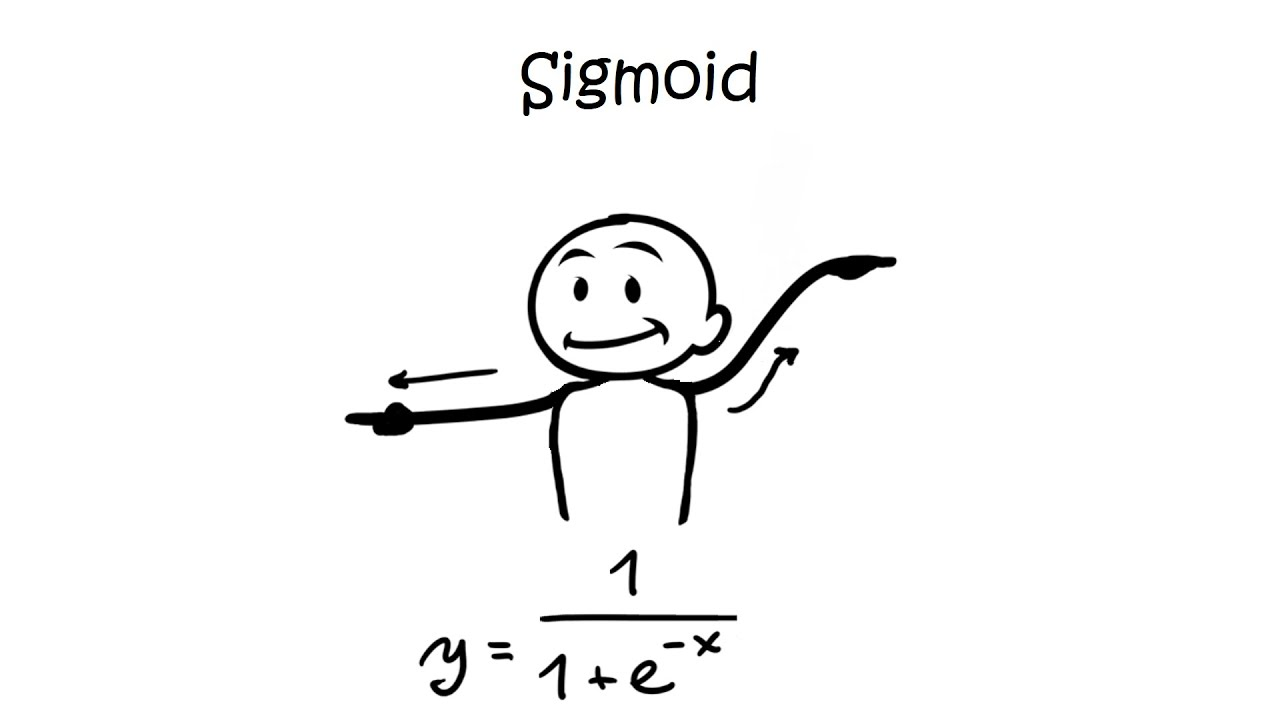

# 비선형 활성함수
- 네트워크에 비선형성을 적용하기 위해 인공 신경망에서 사용되는 함수
- 입력이 단순한 선형 조합이 아닌 형태로 출력을 생하는 함수를 의미함
1. 계단 함수(= 이진 활성화 함수)
- 퍼셉트론에서 최초로 사용된 활성화 함수
- 계단 함수의 입력값의 합이 임곗값을 넘으면 0을 출력, 넘지 못하면 1을 출력
- 딥러닝 모델에서는 사용되지 않는 함수
- 불연속점 -> 미분 불가능
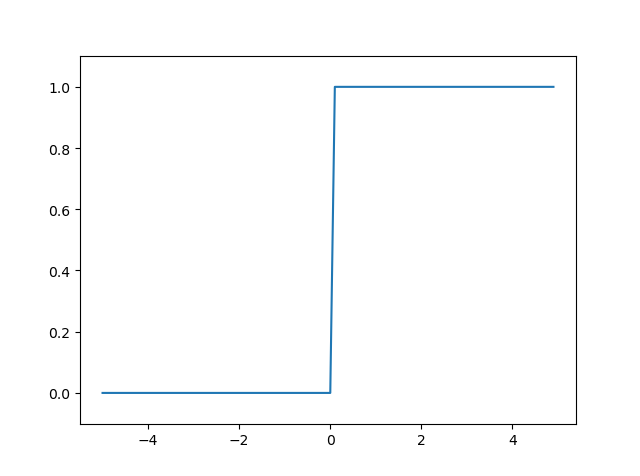

2. 임곗값 함수
- y > 임곗값 -> 입력값
- y < 임곗값 -> 특정 값
- 출력이 0 또는 1인 이진 분류 작업을 위해 신경망에서 자주 사용되는 효과적인 활성화 함수
- but, 입력에 대한 함수의 기울기 계산 불가능 -> 네트워크 최적화 하기 어려워 사용되지 않음
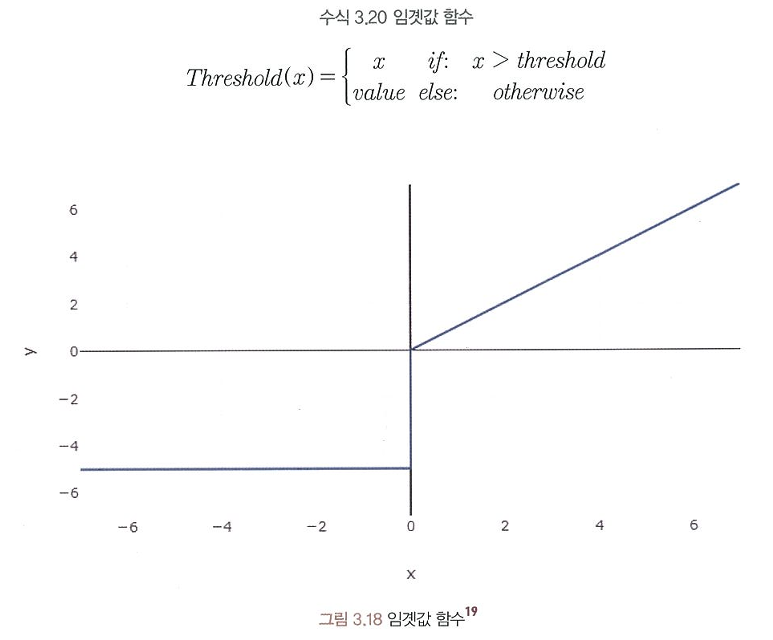

3. 시그모이드 함수
- 은닉층에서는 활성화 함수로 사용하지 않으며, 주로 출력층에서만 사용한다.

4. 하이퍼볼릭 탄젠트 함수
- 시그모이드 함수와 유사한 형태
- 출력값: -1 ~ 1 -> 음수 값을 반환할 수 있음.
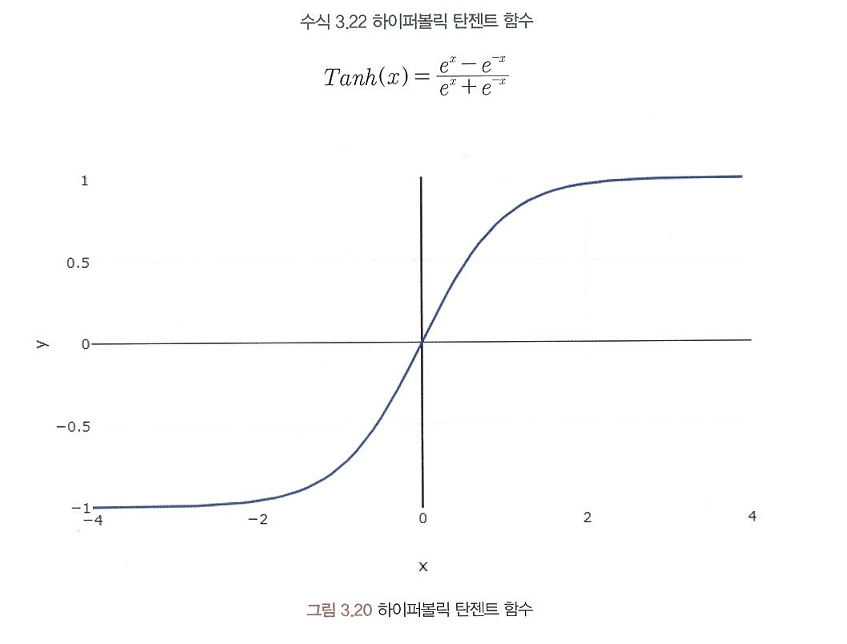

5. ReLU 함수
- y <= 0 -> 0
- y > 0 -> 선형 함수에 값을 대입
- 시그모이드/하이퍼볼릭 탄젠트 함수: 출력값이 제한되어 기울기 소실 발생
but! ReLU 함수는 선형 함수에 대입하기에 입력값이 양수라면 출력값이 제한 되지 않아 기울기 소실이 발생 x
- 수식 간단데스네~ -> 순전파나 역전파 과정의 연산이 매우 빠름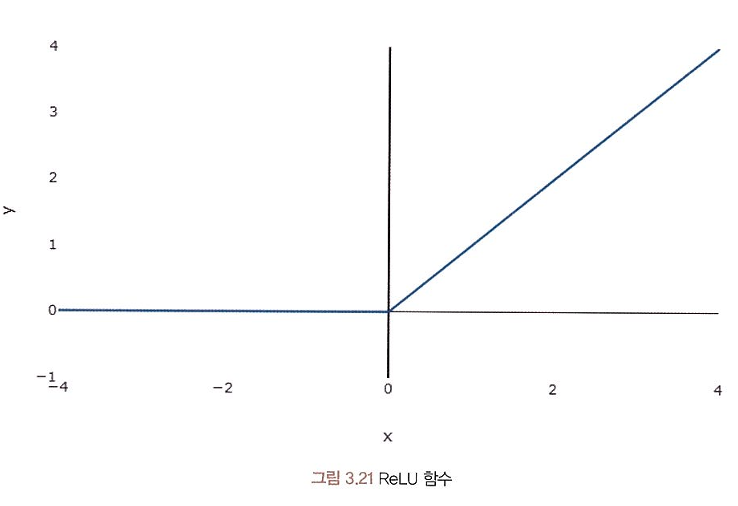

6. LeakyReLU 함수
- 음수 기울기를 제어하여, 죽은 뉴런 현상을 방지하기 위해 사용
- 양수인 경우 ReLU 함수와 동일 but, 음수인 경우 작은 값이라도 출력시켜 기울기 갱신함
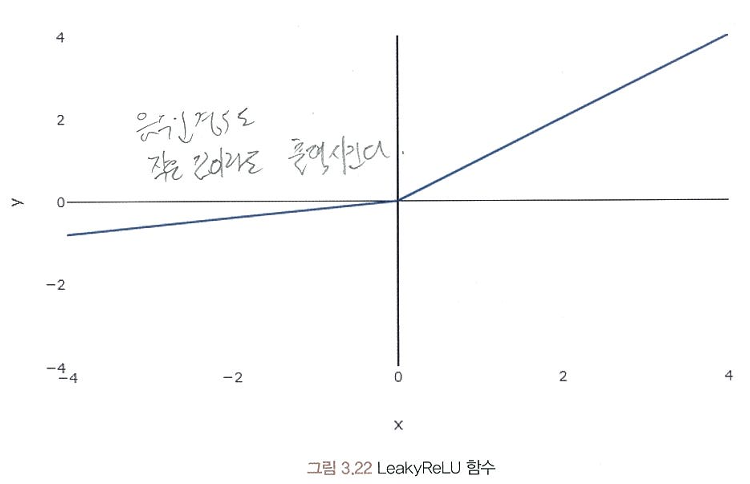

7. PReLU 함수
- LeakyReLU 함수와 형태가 동일 but, 음수 기울기 값을 고정값이 아닌 학습을 통해 갱신되는 값으로 간주
- PReLU 함수의 음수 기울기는 지속해서 값이 변경됨.
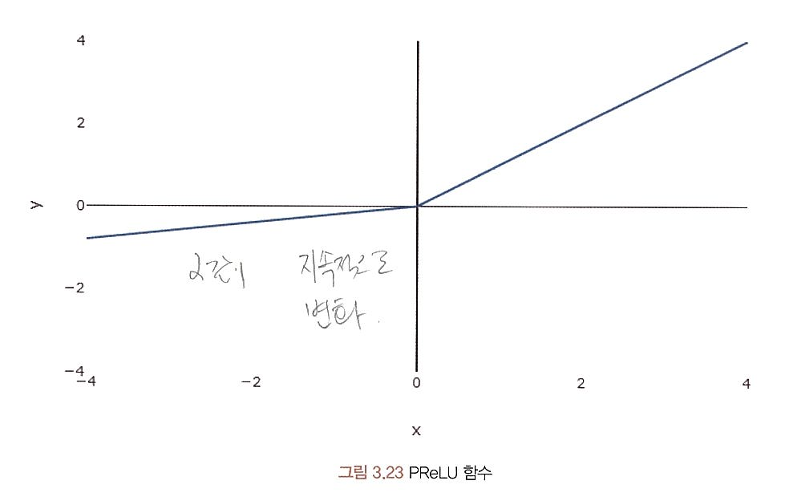

8. ELU 함수
- 지수 함수를 사용하여 부드러운 곡선의 형태를 갖는다.
- 기존 ReLU 함수와 변형 함수는 0에서 끊어지는데
ELU 함수는 음의 기울기에서 비선형 구조를 갖는다.
- 입력값이 0일 때도 출력값이 급변하지 않아, 경사 하강법의 수렴 속도가 비교적 빠름
- 더 복잡한 연산을 진행하게 되므로 학습 속도는 더 느려짐.
- but, ELU 함수는 데이터의 복잡한 패턴과 관계를 학습하는 네트워크의 능력을 향상시키는 데 👍
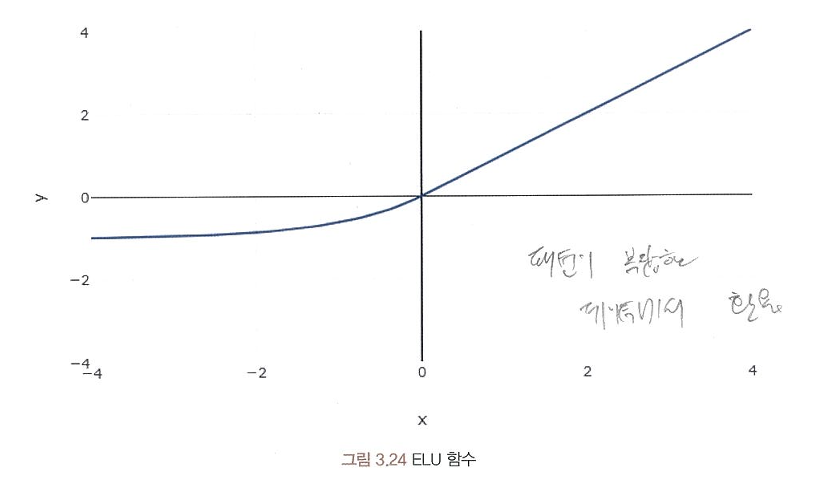

9. 소프트맥스 함수
- 차원 벡터에서 특정 출력값이 k번째 클래스에 속할 확률 계산하느 함수
- 클래스에 속할 확률을 계산하는 활성화 함수
- 은닉층에서 사용 x 출력층에서 사용 o
- 네트워크의 출력이 가능한 클래스에 대한 확률 분포로 매핑

# 순전파 (= 순방향 전달)
- 입력이 주어지면 신경망의 출력을 계산하는 프로세스
- 입력 데이터를 기반으로 신경망을 따라 입력층부터 출력층까지 차례대로 변수를 계산하고 추론한 결과를 전달함.
- 네트워크에 x값을 전달해 순전파 연산 진행

# 역전파
- 순전파 방향과 반대로 연산 진행


In [ ]:
from torch import nn
import torch
import torch.optim as optim

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid(),
        )

        self.layer2 = nn.Sequential(
            nn.Linear(2, 1),
            nn.Sigmoid(),
        )

        self.layer1[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[0.4352, 0.3545],
                          [0.1951, 0.4835]])
        )

        self.layer1[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.1419, 0.0439])
        )

        self.layer2[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[-0.1725, 0.1129]])
        )

        self.layer2[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.3043])
        )

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr = 1)